<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj14/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Część 1: Budowa modelu

## Cel zadania
Zbudować prostą sieć neuronową do przewidywania ceny mieszkania na podstawie metrażu oraz zbadać wpływ learning rate na proces uczenia.

## 1. Zaimportuj niezbędne biblioteki (tensorflow, keras, numpy, matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 2. Zbuduj model sieci neuronowej:
- Użyj keras.Sequential
- Model powinien mieć jeden neuron (Dense(1))
- Określ odpowiedni input_shape

In [2]:
# Metraż (m2)
X = np.array([25, 30, 45, 50, 65, 80, 95, 110]).reshape(-1, 1)

# Cena (tys. PLN)
y = np.array([180, 210, 310, 350, 430, 520, 610, 700])

In [3]:
model = keras.Sequential([layers.Dense(1, input_shape=(1,))]) # 1 neuron, 1 wejście

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Skompiluj model:
- Użyj optymalizatora SGD z learning_rate=0.0001
- Funkcja straty: MSE (Mean Squared Error)

In [4]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001),
    loss='mse'
)

## 4. Wytrenuj model przez 200 epok i zapisz historię uczenia

In [5]:
history = model.fit(X, y, epochs=200, verbose=0)

weights = model.get_weights()
a_learned = weights[0][0][0]
b_learned = weights[1][0]

print(f"\nNauczone parametry:")
print(f"a = {a_learned}")
print(f"b = {b_learned}")


Nauczone parametry:
a = 6.5236968994140625
b = 0.309714138507843


## 5. Przewidź cenę mieszkania o metrażu 70 m2

In [6]:
x = 70
prediction = model.predict(np.array([[x]]))
print(f"Cena mieszkania o metrażu {x} m2 wynosi: {prediction[0][0]:.2f} tys. PLN")

manual_prediction = a_learned * x + b_learned
print(f"Manualna predykcja: {manual_prediction:.2f} tys. PLN")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Cena mieszkania o metrażu 70 m2 wynosi: 456.97 tys. PLN
Manualna predykcja: 456.97 tys. PLN


## Pytania do odpowiedzi
- Ile parametrów ma ten model? Użyj model.summary()
- Co oznacza waga (weight) w kontekście tego problemu?
- Co oznacza bias w kontekście tego problemu?

### Odpowiedzi:
- Model ma 2 parametry (a i b)
- Waga oznacza 'a' w funkcji liniowej czyli współczynnik kierunkow
- Bias oznacza 'b' w funkcji liniowej czyli wyraz wolny

# Część 2: Eksperyment z learning rate

## 1. Wytrenuj ten sam model różnymi learning rate, na przykład:
- lr = 0.000001 (bardzo mały)
- lr = 0.00001 (mały)
- lr = 0.0001 (większy)

Dla każdego przypadku zapisz historię uczenia (obiekt history).

In [7]:
learning_rates = [0.000001, 0.00001, 0.0001]
histories = []

for learning_rate in learning_rates:
    model = keras.Sequential([layers.Dense(1, input_shape=(1,))])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        loss='mse'
    )

    history = model.fit(X, y, epochs=200, verbose=0)

    histories.append(history.history["loss"])

## 2. Narysuj wykres porównawczy:
- Oś X: numer epoki
- Oś Y: wartość błędu (loss)
- 3 linie na jednym wykresie (różne kolory dla różnych lr)
- Dodaj legendę i tytuł


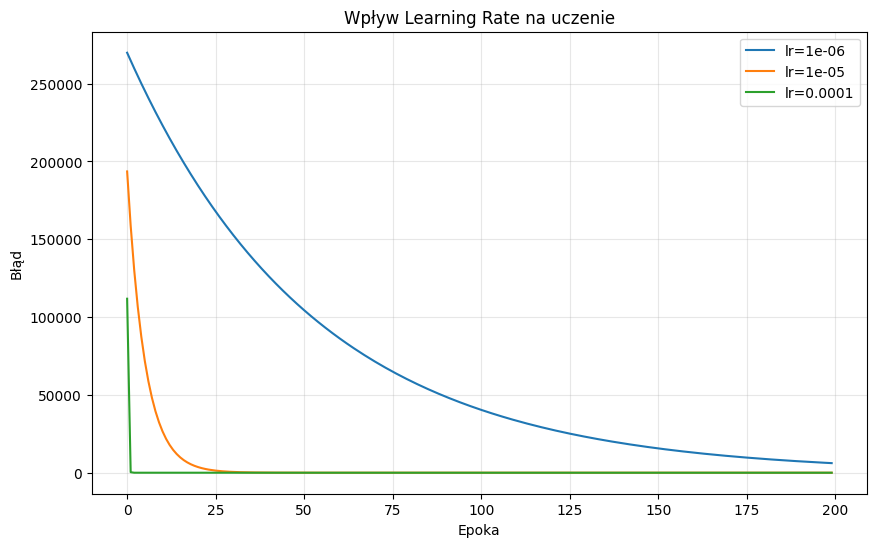

In [8]:
plt.figure(figsize=(10, 6))

for lr, history in zip(learning_rates, histories):
    plt.plot(history, label=f"lr={lr}")
    plt.xlabel("Epoka")
    plt.ylabel("Błąd")

plt.legend()
plt.title("Wpływ Learning Rate na uczenie")
plt.grid(alpha=0.3)
plt.show()

## 3. Napisz wnioski:
- Który learning rate był najlepszy i dlaczego?
- Co się dzieje gdy lr jest za mały?
- Ile epok potrzeba do zbieżności dla każdego lr?

### Odpowiedzi:
- Najlepszy był największy z lerning rates (0.0001), bo najszybciej zminimalizował błąd
- Gdy lerning rate jest za mały to model bardzo powoli się uczy - np lr=0.000001 po 200 epokach dalej nie osiągnął poziomu błędu, który pozostałe lr osiągneły max po 25 epokach
- Dla lr=0.0001 są to ok 3 epoki, dla 0.00001 jest to ok 30 epok, a dla lr=0.000001 będzie to ok 300. Ogólnie to gdy lr maleje 10 razy to ilość epok potrzebnych do zbieżności rośnie 10 razy